## Exploratory Data Analysis

For background on this project, please see the [README](../README.md).

**Notebooks**
- [Data Acquisition & Cleaning](./01_data_acq_clean.ipynb)
- Exploratory Data Analysis (this notebook)
- [Building Recommendation Functions](./03_building_rec_function.ipynb)

**In this notebook, you'll find (for each of the datasets):**
- Descriptive statistics and distributions
- Visualizations of interesting findings

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.patches as mpatches

---
#### **Airbnb Data**

In [2]:
airbnb = pd.read_csv('../datasets/cleaned_data/airbnb_cleaned.csv')

airbnb.head()

,place,state,neighbourhood,price
0,Asheville,NC,Black Mountain,56
1,Asheville,NC,West Asheville,56
2,Asheville,NC,Black Mountain,57
3,Asheville,NC,West Asheville,57
4,Asheville,NC,West Asheville,57


##### Which cities have the most listings overall?

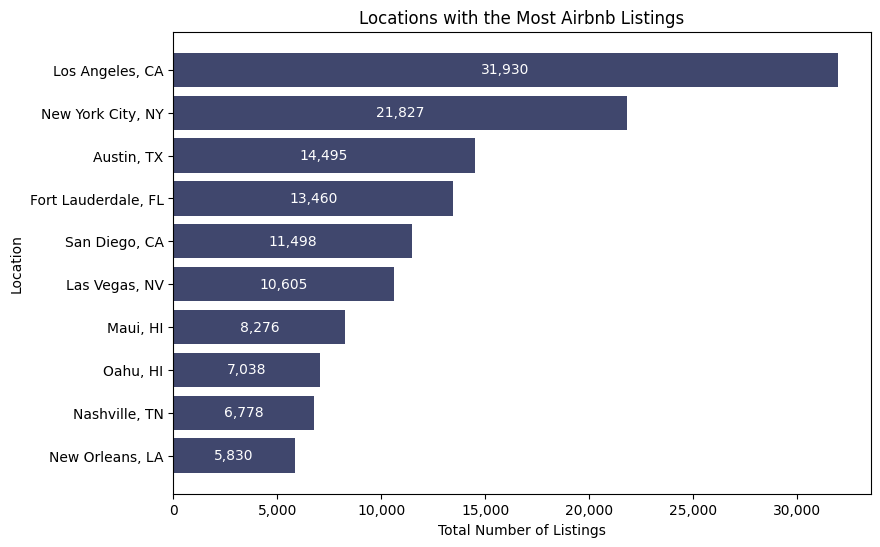

In [3]:
fig, ax = plt.subplots(figsize = (9,6))

city_listing_df = pd.DataFrame(airbnb.groupby(['place', 'state'])['neighbourhood'].count().sort_values(ascending=False).head(10)).reset_index()
city_listing_df['place'] = city_listing_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

city_listings = ax.barh(y = city_listing_df['place'][::-1], width= city_listing_df['neighbourhood'][::-1], color='#40476D')
ax.bar_label(city_listings, labels=[f'{x:,.0f}' for x in city_listings.datavalues], label_type='center', color='white')
ax.set(title='Locations with the Most Airbnb Listings', xlabel='Total Number of Listings', ylabel='Location')
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.show();

- As one would presume, the largest and most tourist-heavy cities have the most listings. Los Angeles and New York City make up more than 25% of all listings in the Airbnb dataset.

- I was not expecting to see Las Vegas on this list, as it seems like more of a hotel-dominated location. However, these counts include the surrounding areas of Las Vegas as well. We find below that the vaguely-named 'unincorporated areas' of Vegas make up a large majority of the area's listings, and the city itself only accounts for 13% of the total rentals.

In [4]:
airbnb[airbnb['place'] == 'Las Vegas']['neighbourhood'].value_counts(normalize=True)

Unincorporated Areas       0.766714
City of Las Vegas          0.129090
City of Henderson          0.059500
City of North Las Vegas    0.035926
City of Mesquite           0.007072
Boulder City               0.001320
Nellis AFB                 0.000377
Name: neighbourhood, dtype: float64

##### How many neighborhood options does each location have?

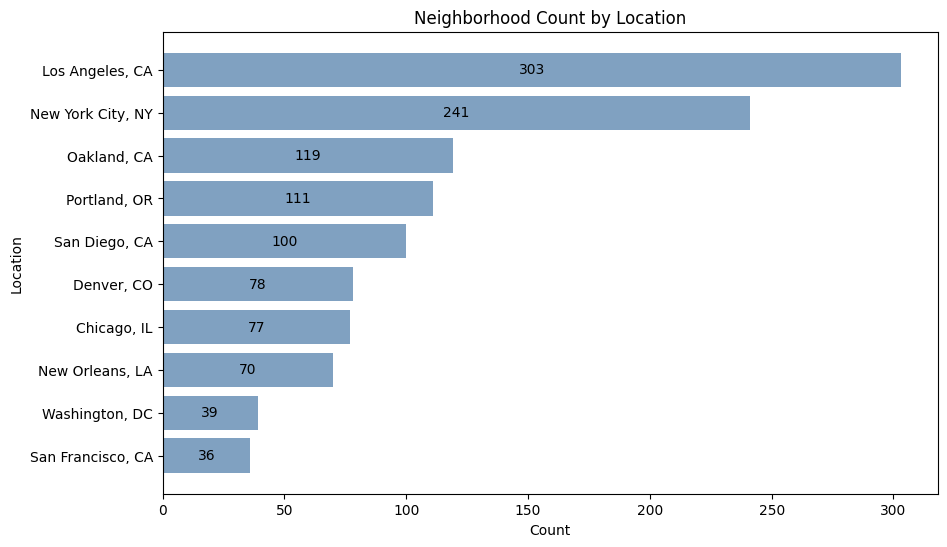

In [5]:
fig, ax = plt.subplots(figsize = (10,6))

nbrd_count_df = pd.DataFrame(airbnb.groupby(['place', 'state'])['neighbourhood'].nunique().sort_values(ascending=False).head(10).reset_index())
nbrd_count_df['place'] = nbrd_count_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

nbrhd_count = ax.barh(y = nbrd_count_df['place'][::-1], width= nbrd_count_df['neighbourhood'][::-1], color='#80A1C1')
ax.bar_label(nbrhd_count, label_type='center')
ax.set(title='Neighborhood Count by Location', xlabel='Count', ylabel='Location')
plt.show();

- We can see that Los Angeles and New York City surpass the other locations by a wide margin, and only four cities have more than 100 neighborhoods to choose from. I'm curious if the cities with more options will be less expensive as there is more supply, or more expensive because these are likely the more popular travel destinations.

##### What are the most and least expensive locations?

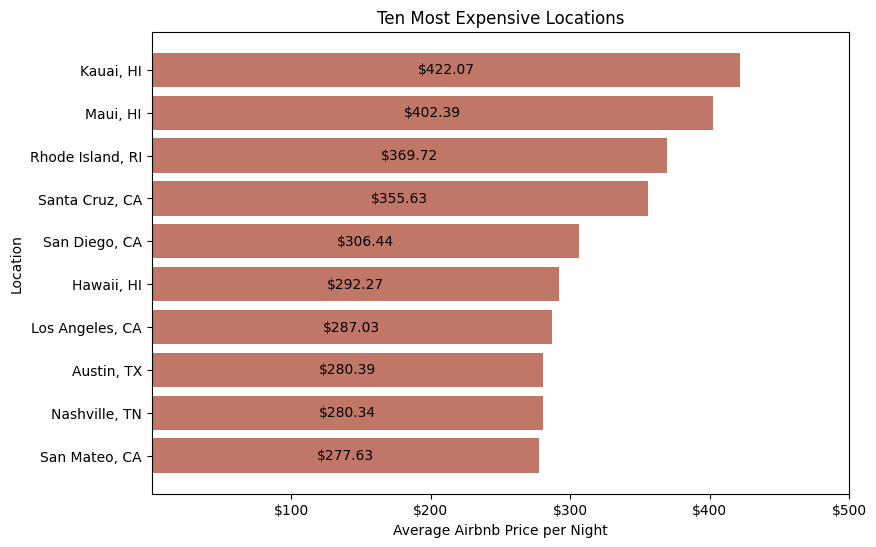

In [6]:
fig, ax = plt.subplots(figsize = (9,6))

most_exp_locs_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).head(10)).reset_index()
most_exp_locs_df['place'] = most_exp_locs_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

most_exp_locs = ax.barh(y = most_exp_locs_df['place'][::-1], width= most_exp_locs_df['price'][::-1], color='#C17767')
ax.bar_label(most_exp_locs, fmt='$%.2f', label_type='center')
ax.set(title='Ten Most Expensive Locations', xlabel='Average Airbnb Price per Night', xticks=[100,200,300,400,500], xticklabels=['$100', '$200', '$300', '$400', '$500'], ylabel='Location')
ax.xaxis.set_tick_params(which='major')
plt.show();

- Three of the four Hawaiian Islands made it on the most expensive list, with a few California additions as well. Somewhat surprisingly, many of the known most expensive US cities (New York City, San Francisco, Washington DC, Boston, Seattle) did not rank in the average top ten most expensive Airbnb rental locations. 

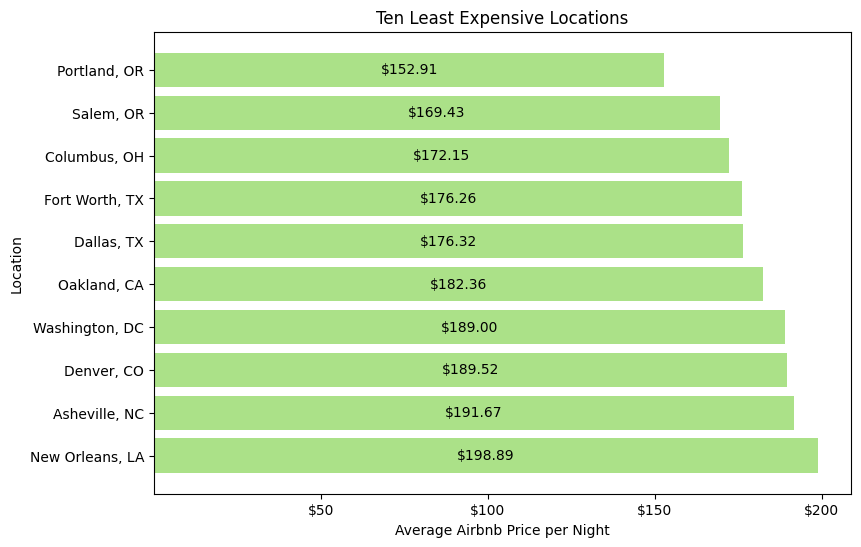

In [7]:
fig, ax = plt.subplots(figsize = (9,6))

least_exp_locs_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).tail(10)).reset_index()
least_exp_locs_df['place'] = least_exp_locs_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

least_exp_locs = ax.barh(y = least_exp_locs_df['place'], width= least_exp_locs_df['price'], color='#ABE188')
ax.bar_label(least_exp_locs, fmt='$%.2f', label_type='center')
ax.set(title='Ten Least Expensive Locations', xlabel='Average Airbnb Price per Night', xticks=[50,100,150,200], xticklabels=['$50', '$100', '$150', '$200'], ylabel='Location')
ax.xaxis.set_tick_params(which='major')
plt.show();

- Oregon takes up the two least expensive location ranks, followed by Columbus, OH and Fort Worth, TX. Interestingly, one of the more expensive places noted above (Washington, DC) made the list. 

- Oakland is the only California location that is on the cheaper end of pricing. 

##### Where are the most expensive neighborhoods located?

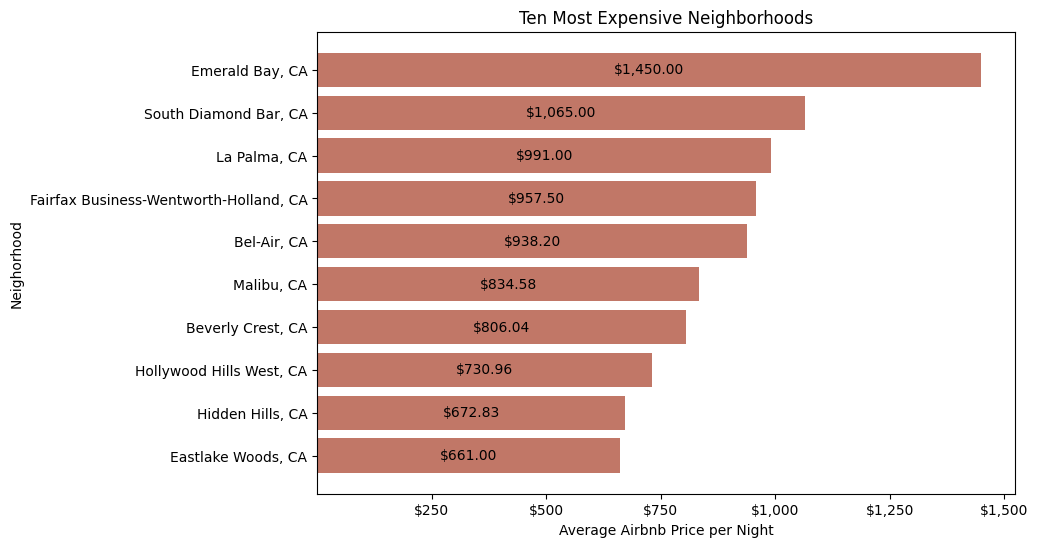

In [8]:
fig, ax = plt.subplots(figsize = (9,6))

most_exp_nbrhds_df = pd.DataFrame(airbnb.pivot_table(index=['neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).head(10)).reset_index()
most_exp_nbrhds_df['neighbourhood'] = most_exp_nbrhds_df[['neighbourhood', 'state']].apply(lambda x: ', '.join(x), axis=1)

most_exp_nbrhds = ax.barh(y = most_exp_nbrhds_df['neighbourhood'][::-1], width= most_exp_nbrhds_df['price'][::-1], color='#C17767')
ax.bar_label(most_exp_nbrhds, labels=[f'${x:,.2f}' for x in most_exp_nbrhds.datavalues], label_type='center')
ax.set(title='Ten Most Expensive Neighborhoods', ylabel='Neighorhood', xlabel='Average Airbnb Price per Night', xticks=[250, 500, 750, 1000, 1250, 1500], xticklabels=['$250', '$500', '$750', '$1,000', '$1,250', '$1,500'])
ax.xaxis.set_tick_params(which='major')
plt.show();

In [9]:
airbnb.pivot_table(index=['place', 'neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).head(10)

price
place       neighbourhood                      state             
Los Angeles Emerald Bay                        CA     1450.000000
            South Diamond Bar                  CA     1065.000000
            La Palma                           CA      991.000000
Oakland     Fairfax Business-Wentworth-Holland CA      957.500000
Los Angeles Bel-Air                            CA      938.200000
            Malibu                             CA      834.578767
            Beverly Crest                      CA      806.043860
            Hollywood Hills West               CA      730.962217
            Hidden Hills                       CA      672.833333
San Diego   Eastlake Woods                     CA      661.000000

- All of the top ten most expensive neighborhoods are in California. Despite Los Angeles ranking only the 7th most expensive location in our prior graph, eight of these ten neighborhoods are located in LA.

- I am also curious to see if these values are being skewed by one or two more expensive listings, or if the median values are close to the means which would indicate that these neighborhoods are about as expensive as they appear.

In [10]:
exp_nbrhds_median_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).head(10)).reset_index()
exp_nbrhds_median_df.rename(columns={'price': 'avg_price'}, inplace=True)
exp_nbrhds_median_df['median_price'] = [(airbnb[airbnb['neighbourhood'] == nbrhd]['price'].median()) for nbrhd in exp_nbrhds_median_df['neighbourhood']]
exp_nbrhds_median_df['price_diff'] = [val2 for val2 in (val[0] for val in np.diff(exp_nbrhds_median_df[['avg_price', 'median_price']]).tolist())]
exp_nbrhds_median_df['nbrhd_counts'] = [(airbnb[airbnb['neighbourhood'] == nbrhd]['place'].count()) for nbrhd in exp_nbrhds_median_df['neighbourhood']]
exp_nbrhds_median_df

,place,neighbourhood,state,avg_price,median_price,price_diff,nbrhd_counts
0,Los Angeles,Emerald Bay,CA,1450.000000,1450.0,0.000000,2
1,Los Angeles,South Diamond Bar,CA,1065.000000,1065.0,0.000000,2
2,Los Angeles,La Palma,CA,991.000000,995.0,4.000000,3
3,Oakland,Fairfax Business-Wentworth-Holland,CA,957.500000,957.5,0.000000,2
4,Los Angeles,Bel-Air,CA,938.200000,793.0,-145.200000,35
5,Los Angeles,Malibu,CA,834.578767,750.0,-84.578767,292
6,Los Angeles,Beverly Crest,CA,806.043860,662.5,-143.543860,114
7,Los Angeles,Hollywood Hills West,CA,730.962217,558.0,-172.962217,397
8,Los Angeles,Hidden Hills,CA,672.833333,375.0,-297.833333,6
9,San Diego,Eastlake Woods,CA,661.000000,661.0,0.000000,1


- From the above, we can see that the median prices for five of the neighborhoods are significantly less than the average prices. We can reasonably conclude here that there are a few exorbitantly-priced rentals in these neighborhoods that are shifting the averages up.

- For the other five neighborhoods that did not have significant price differences, these all have three listings or less meaning that there are fewer observations that we have to measure and analyze.

##### Where are the least expensive neighborhoods located?

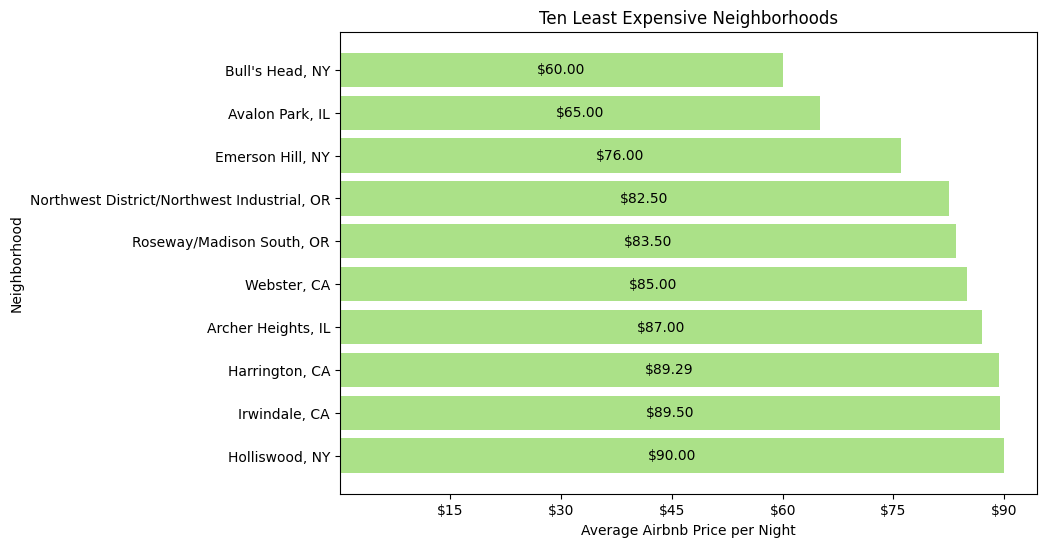

In [11]:
fig, ax = plt.subplots(figsize = (9,6))

least_exp_nbrhds_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).tail(10)).reset_index()
least_exp_nbrhds_df['neighbourhood'] = least_exp_nbrhds_df[['neighbourhood', 'state']].apply(lambda x: ', '.join(x), axis=1)

least_exp_nbrhds = ax.barh(y = least_exp_nbrhds_df['neighbourhood'], width= least_exp_nbrhds_df['price'], color='#ABE188')
ax.bar_label(least_exp_nbrhds, labels=[f'${x:,.2f}' for x in least_exp_nbrhds.datavalues], label_type='center')
ax.set(title='Ten Least Expensive Neighborhoods', ylabel='Neighborhood', xlabel='Average Airbnb Price per Night', xticks=[15, 30, 45, 60, 75, 90], xticklabels=['$15', '$30', '$45', '$60', '$75', '$90'])
ax.xaxis.set_tick_params(which='major')
plt.show();

In [12]:
cheap_nbrhds_median_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price').head(10)).reset_index()
cheap_nbrhds_median_df.rename(columns={'price': 'avg_price'}, inplace=True)
cheap_nbrhds_median_df['median_price'] = [(airbnb[airbnb['neighbourhood'] == nbrhd]['price'].median()) for nbrhd in cheap_nbrhds_median_df['neighbourhood']]
cheap_nbrhds_median_df['price_diff'] = [val2 for val2 in (val[0] for val in np.diff(cheap_nbrhds_median_df[['avg_price', 'median_price']]).tolist())]
cheap_nbrhds_median_df['nbrhd_counts'] = [(airbnb[airbnb['neighbourhood'] == nbrhd]['place'].count()) for nbrhd in cheap_nbrhds_median_df['neighbourhood']]
cheap_nbrhds_median_df

,place,neighbourhood,state,avg_price,median_price,price_diff,nbrhd_counts
0,New York City,Bull's Head,NY,60.000000,60.0,0.000000,1
1,Chicago,Avalon Park,IL,65.000000,65.0,0.000000,1
2,New York City,Emerson Hill,NY,76.000000,76.0,0.000000,1
3,Portland,Northwest District/Northwest Industrial,OR,82.500000,69.0,-13.500000,4
4,Portland,Roseway/Madison South,OR,83.500000,83.5,0.000000,2
5,Oakland,Webster,CA,85.000000,193.0,108.000000,15
6,Chicago,Archer Heights,IL,87.000000,99.0,12.000000,3
7,Oakland,Harrington,CA,89.285714,95.0,5.714286,7
8,Los Angeles,Irwindale,CA,89.500000,89.5,0.000000,2
9,New York City,Holliswood,NY,90.000000,90.0,0.000000,1


- For the least expensive neighborhoods, we have a similar type of chart where all but one have seven listings available or less. In the neighborhood that has 15 rentals, we see a more realistic price in the median.

- We can glean from this that these very cheap values may be representative of the neighborhoods themselves (mainly because many only have one or two listings), but are more than likely not representative of the cities they're located in.

---
#### **Restaurant Data**

In [13]:
food = pd.read_csv('../datasets/cleaned_data/food_cleaned.csv')

food.head()

,restaurantname,cuisine,city,state,frequency,ischain,ischain_y_n
0,Subway,Restaurant,Los Angeles,CA,24333,1,Yes
1,Subway,American Deli,San Diego,CA,24333,1,Yes
2,Subway,Restaurant,Los Angeles,CA,24333,1,Yes
3,Subway,Restaurant,San Mateo,CA,24333,1,Yes
4,Subway,Restaurant,Los Angeles,CA,24333,1,Yes


##### Which locations have the highest ratio of chain restaurants?

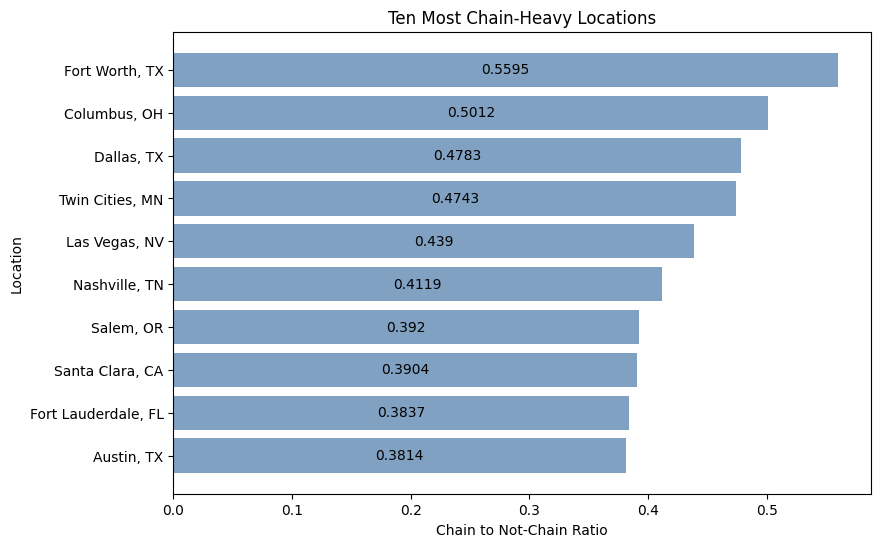

In [14]:
chain_ratios_df = pd.DataFrame(food.pivot_table(index=['city', 'state'], columns='ischain_y_n', values='ischain', aggfunc='count')).reset_index()
chain_ratios_df['city'] = chain_ratios_df[['city', 'state']].apply(lambda x: ', '.join(x), axis=1)
chain_ratios_df['chain_ratio'] = round(chain_ratios_df['Yes'] / (chain_ratios_df['No'] + chain_ratios_df['Yes']), 4)
most_chainy = chain_ratios_df.sort_values('chain_ratio', ascending=False).head(10)

fig, ax = plt.subplots(figsize = (9,6))

high_chain_ratio_plot = ax.barh(y = most_chainy['city'][::-1], width= most_chainy['chain_ratio'][::-1], color='#80A1C1')
ax.bar_label(high_chain_ratio_plot, label_type='center')
ax.set(title='Ten Most Chain-Heavy Locations', xlabel='Chain to Not-Chain Ratio', ylabel='Location')
plt.show();

- Based on these top ten alone, it looks like there may be a moderately-strong trend of higher chain restaurant ratios in the Southern and Midwest states. All three Texas locations ranked in the top chain-heavy list, as did Florida and Ohio. 

- We do notice a weak presence of the East- and West-coast states like New York, New Jersey, Hawaii, etc. Of the 33 locations included in the food dataset, California is the most represented with seven cities - but only shows up once on the chain-heavy list. 

- Before we can conclude that coastal states (aside from Florida) have less chain restaurants overall, we must first look at the locations that have the lowest chain ratios.

##### Which locations have the lowest ratios of chain restaurants?

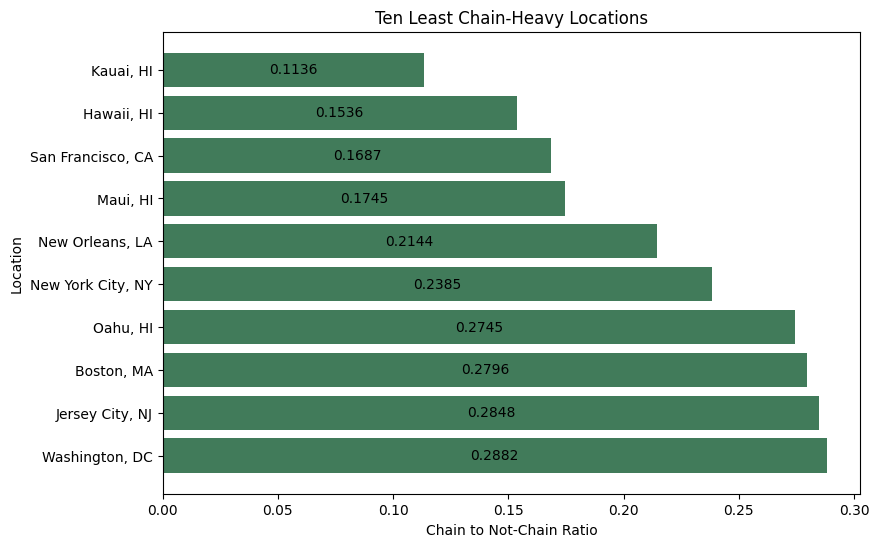

In [15]:
least_chainy = chain_ratios_df.sort_values('chain_ratio', ascending=False).tail(10)

fig, ax = plt.subplots(figsize = (9,6))

low_chain_ratio_plot = ax.barh(y = least_chainy['city'], width= least_chainy['chain_ratio'], color='#417B5A')
ax.bar_label(low_chain_ratio_plot, label_type='center')
ax.set(title='Ten Least Chain-Heavy Locations', xlabel='Chain to Not-Chain Ratio', ylabel='Location')
plt.show();

- We immediately notice that all four Hawaiian Islands rank on our list as less chain-heavy. We also see more of the East- and West- coast places like NYC, NJ, and DC.

- Again, California is not a huge presence here. This means that aside from Santa Clara and San Francisco, the other CA cities fall somewhere in the middle of the chain ratio spectrum.

- Finally, if we look back to our previous graph, we find that the difference in the highest not-chain-heavy ratio and the lowest chain-heavy ratio is only about 10%. So the 13 other locations that were not on either list fall somewhere between 28% and 38%.

In [16]:
# Plotting on a choropleth map to view all locations together, aggregated by state mean

chain_rank_by_state = pd.DataFrame(chain_ratios_df.pivot_table(index='state', values='chain_ratio', aggfunc='mean')).reset_index()

chain_ratio_us = px.choropleth(chain_rank_by_state, locations='state',
            locationmode='USA-states',
            scope='usa',
            color='chain_ratio',
            color_continuous_scale='rdylbu',
            labels={'chain_ratio':'Chain to Not-Chain Ratio'}
            )

chain_ratio_us.show()

- We do lose some interpretability in this map, given that, 1) we do not have data on all states in the US to compare to, and 2) many of these states only have one city to represent the base ratio while others have three, four, or five cities' worth of data.

- As always in data science, more data would be better here. That said, if we're looking at the map from a general perspective, we can see that as a whole, the states that have a greater chain ratio (indicated in blue for >mean chain ratio) are mostly grouped in the center of the map and those that have a lower chain ratio (indicated in red/orange) are spread more along the coasts. 

##### What are the most common chains seen in all locations?

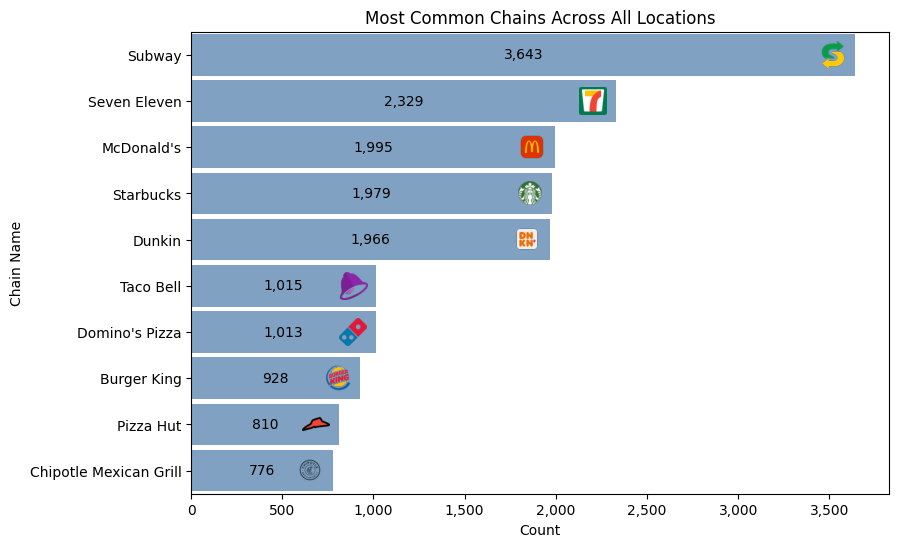

In [17]:
common_chains = pd.DataFrame(food['restaurantname'].value_counts().head(10)).reset_index()

fig, ax = plt.subplots(figsize = (9,6))

height = 0.9
common_chains_plot = ax.barh(y = common_chains['index'][::-1], width= common_chains['restaurantname'][::-1], height = height, color='#80A1C1')
ax.bar_label(common_chains_plot, labels=[f'{x:,.0f}' for x in common_chains['restaurantname'][::-1]], label_type='center')
for i, (rest_name, rest_count) in enumerate(zip(common_chains['index'][::-1], common_chains['restaurantname'][::-1])):
    img_dir = f"../images/logos/{rest_name}.png"
    img = plt.imread(img_dir)
    plt.imshow(img, aspect = 'auto', extent=[rest_count - 200, rest_count-50, i - height / 3, i + height / 3], zorder=2)
ax.set(title='Most Common Chains Across All Locations', xlabel='Count', ylabel='Chain Name')
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.xlim(0, common_chains['restaurantname'].max() * 1.05)
plt.ylim(-0.5, len(common_chains) - 0.5)
plt.show();

# Restaurant logos courtesy of: https://icons8.com/

- Because these are the most frequent chains seen across all locations, we may be missing some local or regional chains with more presence in one location but very little in others (e.g. Chick-fil-A, White Castle, In-N-Out, etc.).

##### What are the most common chains in the high-chain ratio locations?

In [18]:
most_chainy['top_chain'] = [food[food['city'] == city[:-4]]['restaurantname'].mode()[0] for city in most_chainy['city']]
most_chainy.drop(columns=['state']).reset_index(drop=True)

ischain_y_n,city,No,Yes,chain_ratio,top_chain
0,"Fort Worth, TX",1874,2380,0.5595,Subway
1,"Columbus, OH",1441,1448,0.5012,Subway
2,"Dallas, TX",3040,2787,0.4783,Seven Eleven
3,"Twin Cities, MN",2912,2627,0.4743,Subway
4,"Las Vegas, NV",2826,2211,0.4390,Seven Eleven
5,"Nashville, TN",1342,940,0.4119,Subway
6,"Salem, OR",442,285,0.3920,Subway
7,"Santa Clara, CA",2737,1753,0.3904,Subway
8,"Fort Lauderdale, FL",2883,1795,0.3837,Subway
9,"Austin, TX",2173,1340,0.3814,Seven Eleven


- I'd originally thought to plot this, but we can see above that Subway and 7/11 are the only two chains that are most common in all high-chain locations, which would not make for a very interesting visualization.

##### What are the most common cuisines in all locations?

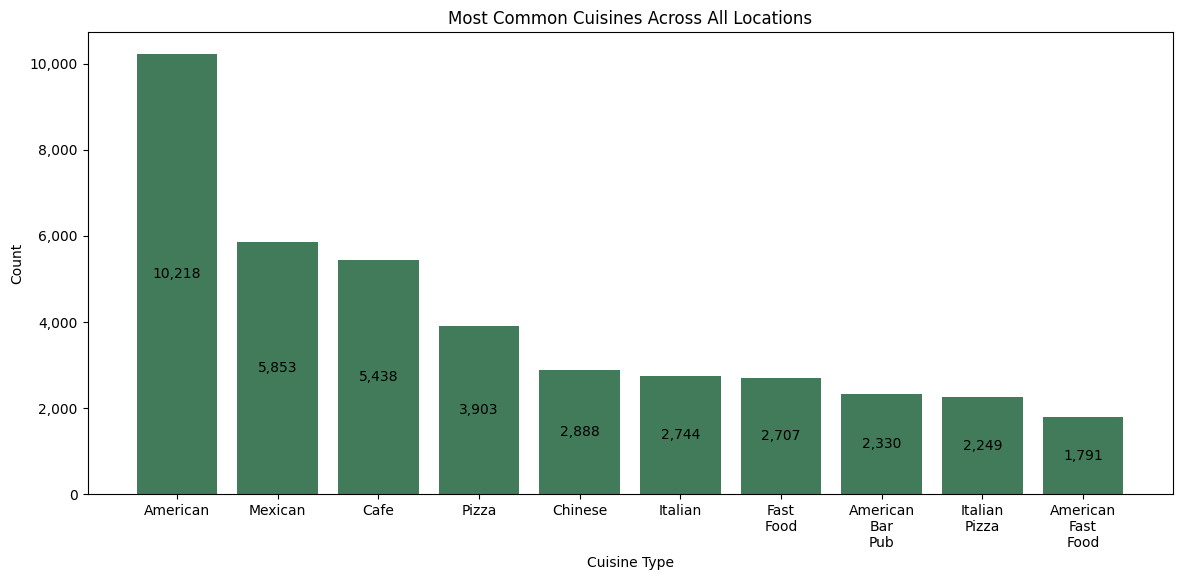

In [19]:
common_cuisines = pd.DataFrame(food[food['cuisine'] != 'Restaurant']['cuisine'].value_counts().head(10)).reset_index()

fig, ax = plt.subplots(figsize = (14,6))

common_cuisines_plot = ax.bar(x= common_cuisines['index'], height= common_cuisines['cuisine'], color='#417B5A')
ax.bar_label(common_cuisines_plot, labels=[f'{x:,.0f}' for x in common_cuisines['cuisine']], label_type='center')
ax.set(title='Most Common Cuisines Across All Locations', xlabel='Cuisine Type', ylabel='Count', xticks=list(range(len(common_cuisines['index']))), xticklabels=[cuisine.replace(' ', '\n') for cuisine in common_cuisines['index']])
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.show();

- Because almost 60,000 of the cuisine types were noted as 'Restaurant,' we filtered those out and found that American is the cuisine seen most frequently across all of the locations. 

- It's important to note that there are 8,149 unique cuisine types in the food dataframe, meaning that the more specific types will usually be buried by the more generally-named types, as seen above.

##### What is the most common cuisine in each location?

In [20]:
comm_cuisine_by_city = pd.DataFrame(columns=('city', 'state', 'most_common_cuisine'))

for city in food['city'].unique():
    comm_cuisine = food[(food['city'] == city) & (food['cuisine'] != 'Restaurant')]['cuisine'].mode()[0]
    city_state = food[food['city'] == city]['state'].unique()[0]
    temp_list = [city, city_state, comm_cuisine]
    comm_cuisine_by_city.loc[len(comm_cuisine_by_city)] = temp_list

comm_cuisine_by_city

,city,state,most_common_cuisine
0,Los Angeles,CA,American
1,San Diego,CA,Mexican
2,San Mateo,CA,American
3,San Francisco,CA,Cafe
4,Oakland,CA,American
5,Santa Clara,CA,American
6,Santa Cruz,CA,American
7,Denver,CO,American
8,Washington,DC,American
9,Fort Lauderdale,FL,American


A few thoughts on the above:
- I'd posit that we may not be able to use cuisine-type preference as a user-input value when making recommendations, because many cities have the same top one, two, or three cuisine types.

- Though the definition of a chain is that there are a lot of them, I was surprised by the lack of distinction in chains and cuisines in each of the states. 

---
#### **Cost of Living**

In [21]:
coli = pd.read_csv('../datasets/cleaned_data/coli_cleaned.csv')

coli.head()

,name,state,cost_of_living,grocery_cost_idx,transportation_cost_idx,miscellaneous_cost_idx,population,median_age,summer_comfort_index,winter_comfort_index,perc_growth_since_2020,political_left_lean,political_right_lean
0,Asheville,NC,105.7,103.1,82.8,111.2,92852,38.6,8.5,6.0,0.090,0.597,0.386
1,Austin,TX,129.4,96.7,109.9,105.9,995484,32.7,3.7,7.9,0.200,0.714,0.264
2,Boston,MA,153.4,111.4,131.8,157.9,691531,32.0,9.1,4.9,0.110,0.806,0.175
3,Cambridge,MA,173.7,115.5,95.7,176.7,119192,30.4,9.2,4.8,0.071,0.715,0.263
4,Chicago,IL,107.4,97.2,138.5,139.8,2677643,34.1,9.0,4.7,0.007,0.742,0.240


*Note: These values are aggregated measures of county data i.e. 'New York City' is the average of Bronx County, Kings County, New York County, Queens County, and Richmond County.*

##### Which locations have the highest cost of living indices? 

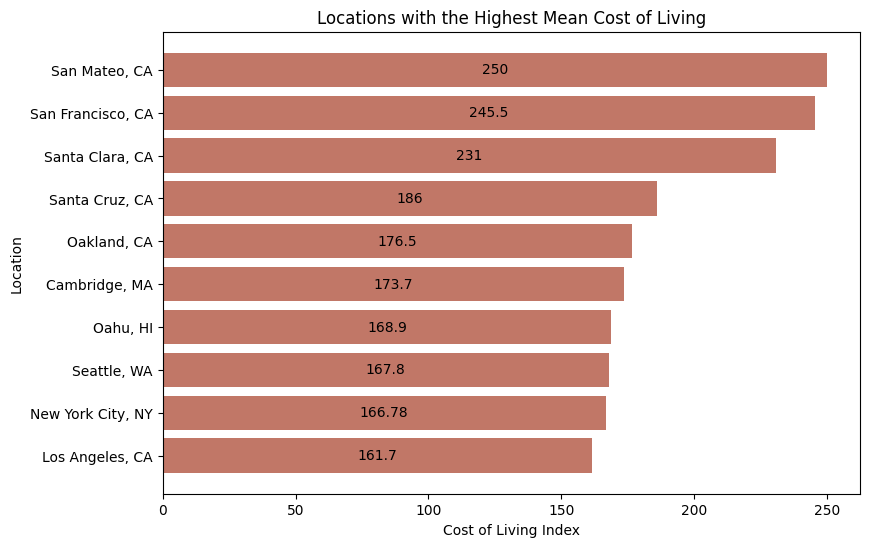

In [22]:
high_coli = coli.sort_values('cost_of_living', ascending=False).head(10)
high_coli['name'] = high_coli[['name', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (9,6))

high_coli_plot = ax.barh(y = high_coli['name'][::-1], width= high_coli['cost_of_living'][::-1], color='#C17767')
ax.bar_label(high_coli_plot, label_type='center')
ax.set(title='Locations with the Highest Mean Cost of Living', xlabel='Cost of Living Index', ylabel='Location')
plt.show();

- All Northern California locations on our list are in the top five greatest cost of living slots.

- All of the locations seen above are West or East coast cities. 

##### Which locations have the lowest cost of living indices? 

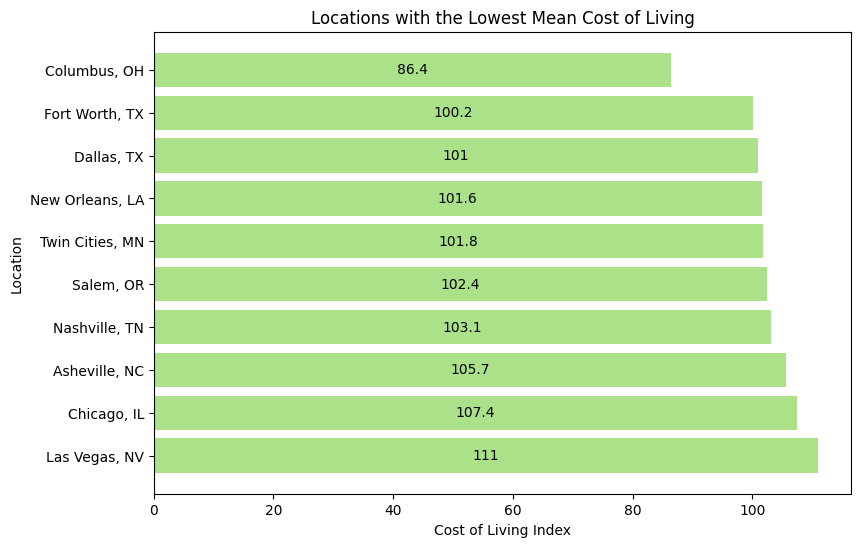

In [23]:
low_coli = coli.sort_values('cost_of_living', ascending=False).tail(10)
low_coli['name'] = low_coli[['name', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (9,6))

low_coli_plot = ax.barh(y = low_coli['name'], width= low_coli['cost_of_living'], color='#ABE188')
ax.bar_label(low_coli_plot, label_type='center')
ax.set(title='Locations with the Lowest Mean Cost of Living', xlabel='Cost of Living Index', ylabel='Location')
plt.show();

- Columbus, OH is the only location on our list with a cost of living index less than the 100.0 US average. 

- We are seeing somewhat of a similar location pattern to our restaurant data, where the Midwest and Southern states tend to group together, and the coastal states are in a separate group on the opposite end of the spectrum. 

##### Is there a correlation between cost of living and a political lean? 

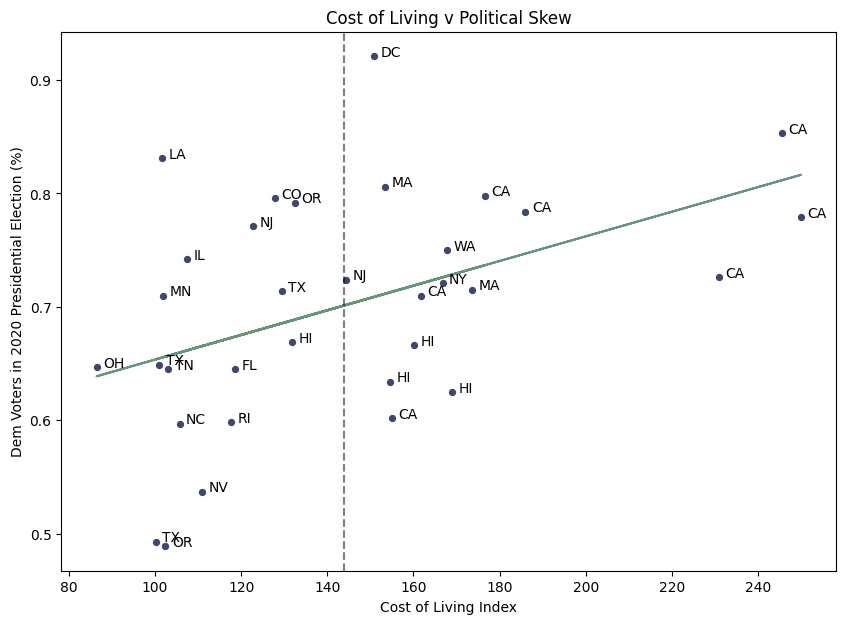

In [24]:
fig, ax = plt.subplots(figsize = (10,7))

# Adding points
ax.scatter(coli['cost_of_living'], coli['political_left_lean'], s=18, c='#40476D')

# Adding state abbreviation annotations
for i, (col, pol, state) in enumerate(zip(coli['cost_of_living'], coli['political_left_lean'], coli['state'])):
    ax.annotate(state, (col +1.5, pol))

# Plot titles and labeling
ax.set(title='Cost of Living v Political Skew', xlabel='Cost of Living Index', ylabel='Dem Voters in 2020 Presidential Election (%)')

# Plotting trendline
z = np.polyfit(coli['cost_of_living'], coli['political_left_lean'], 1)
p = np.poly1d(z)
plt.plot(coli['cost_of_living'], p(coli['cost_of_living']), color= '#417B5A', alpha=0.8)

# Plotting vertical line
plt.axvline(x=coli['cost_of_living'].mean(), color = 'black', linestyle='dashed', alpha=0.5)

plt.show();

- While there are a few outliers (Lousiana and DC), we are again having the same states show up in the same groups. The vertical line plotted near the 140 cost of living index highlights these clusters, as we can see clearly that the right side of the line contains the Western and Northeastern states, while the left side contains mostly Midwestern and Southeastern states.

---
#### **Weather**

In [25]:
weather = pd.read_csv('../datasets/cleaned_data/weather_combined.csv')

weather.head()

,place,state,jan_avg_temp,feb_avg_temp,mar_avg_temp,apr_avg_temp,may_avg_temp,jun_avg_temp,jul_avg_temp,aug_avg_temp,...,nov_avg_rain,dec_avg_rain,winter_avg_temp,spring_avg_temp,summer_avg_temp,autumn_avg_temp,winter_avg_rain,spring_avg_rain,summer_avg_rain,autumn_avg_rain
0,Asheville,NC,36.6,37.6,48.8,51.8,59.4,68.1,71.0,71.5,...,3.11,3.69,40.166667,53.333333,70.200000,55.333333,3.710000,4.160000,4.713333,3.423333
1,Austin,TX,51.4,46.5,62.6,66.7,73.0,81.2,82.0,83.8,...,2.52,2.42,53.400000,67.433333,82.333333,70.366667,2.243333,3.256667,2.386667,3.026667
2,Boston,MA,31.2,30.1,40.9,49.0,59.2,71.7,70.4,74.6,...,4.04,4.01,33.100000,49.700000,72.233333,56.000000,3.810000,3.790000,3.463333,3.703333
3,Cambridge,MA,29.6,27.5,39.4,48.8,59.3,71.1,70.0,73.8,...,4.00,3.85,31.100000,49.166667,71.633333,54.533333,3.570000,3.706667,3.523333,3.676667
4,Chicago,IL,28.4,18.9,43.1,50.6,58.8,72.8,73.4,75.6,...,2.44,2.04,28.133333,50.833333,73.933333,55.766667,1.760000,3.223333,3.643333,2.853333


##### Which locations are the warmest, on average?

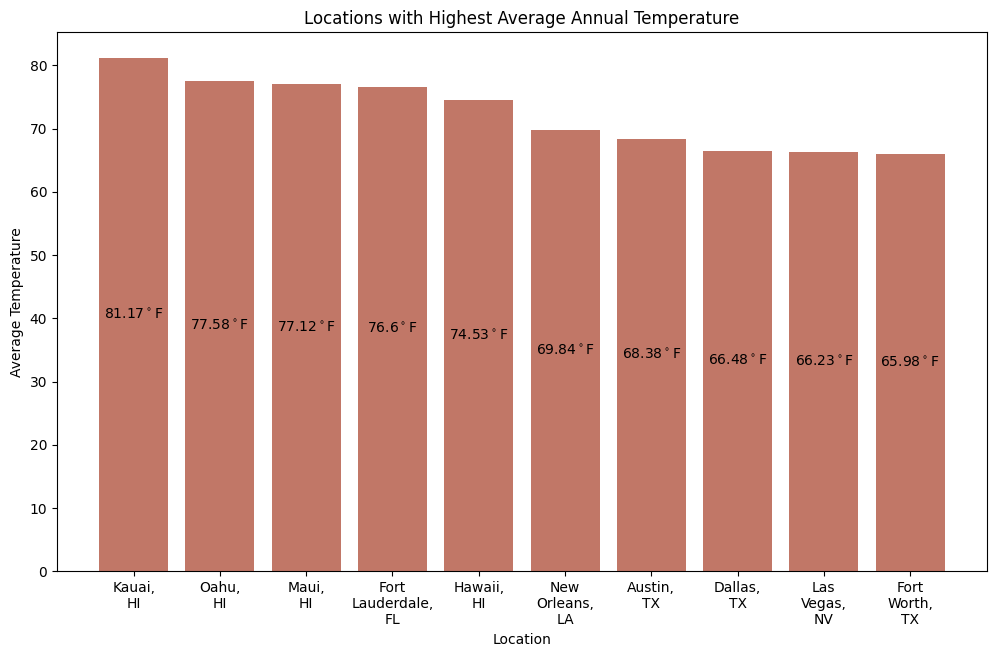

In [26]:
annual_temp_df = pd.DataFrame(columns=('place', 'state', 'avg_annual_temp'))

for i, (avg_temp, place, state) in enumerate(sorted(list(zip(weather.iloc[:, 2:14].mean(axis=1), weather['place'], weather['state'])),reverse=True)):
    avg_temp_list = [place, state, avg_temp]
    annual_temp_df.loc[len(annual_temp_df)] = avg_temp_list
annual_temp_df['place'] = annual_temp_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (12,7))

warm_plot = ax.bar(x=annual_temp_df['place'][:10], height=annual_temp_df['avg_annual_temp'][:10], color= '#C17767')
ax.bar_label(warm_plot, labels=[(str(round(degrees, 2)) + '$^\circ$F') for degrees in annual_temp_df['avg_annual_temp'][:10]], label_type='center')
ax.set(title='Locations with Highest Average Annual Temperature', xlabel='Location', ylabel='Average Temperature', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in annual_temp_df['place'][:10]])
plt.show();

- All four Hawaiian Islands and three Texas locations ranked high on the list of average annual temperature, though, we'd theorize, for different reasons. 

- This is a very broad view of relative warmth in each place - Hawaii's temperature consistently sits around the 70&deg;s to 80&deg;s range, with some variance, of course. Texas, however, can get cold, but can also be very hot, which averages out to about the 60&deg;s to 70&deg;s range, as seen above.

##### Which locations are the coldest, on average?

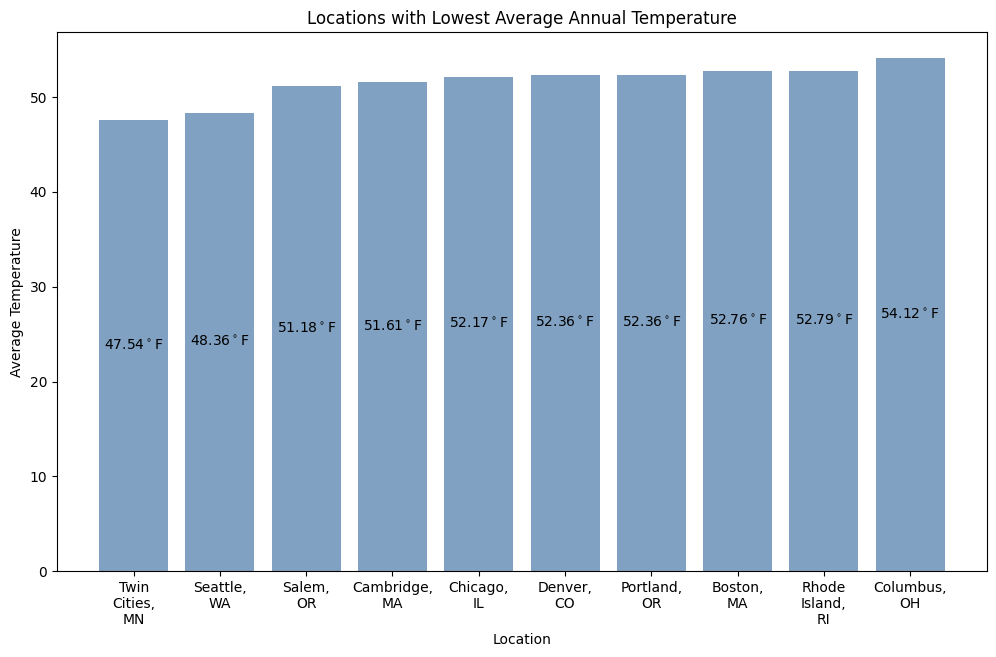

In [27]:
fig, ax = plt.subplots(figsize = (12,7))

cold_plot = ax.bar(x=annual_temp_df['place'][-10:][::-1], height=annual_temp_df['avg_annual_temp'][-10:][::-1], color= '#80A1C1')
ax.bar_label(cold_plot, labels=[(str(round(degrees, 2)) + '$^\circ$F') for degrees in annual_temp_df['avg_annual_temp'][-10:][::-1]], label_type='center')
ax.set(title='Locations with Lowest Average Annual Temperature', xlabel='Location', ylabel='Average Temperature', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in annual_temp_df['place'][-10:][::-1]])
plt.show();

- These results are not entirely unexpected, as all locations have some relatively close proximity to water and/or mountains. 

- Because weather is not at all related to a location's culture or socioeconomic policy, our weather plots do not see the same regional separation that we noticed in our other charts.

##### Which locations see the most rain annually?

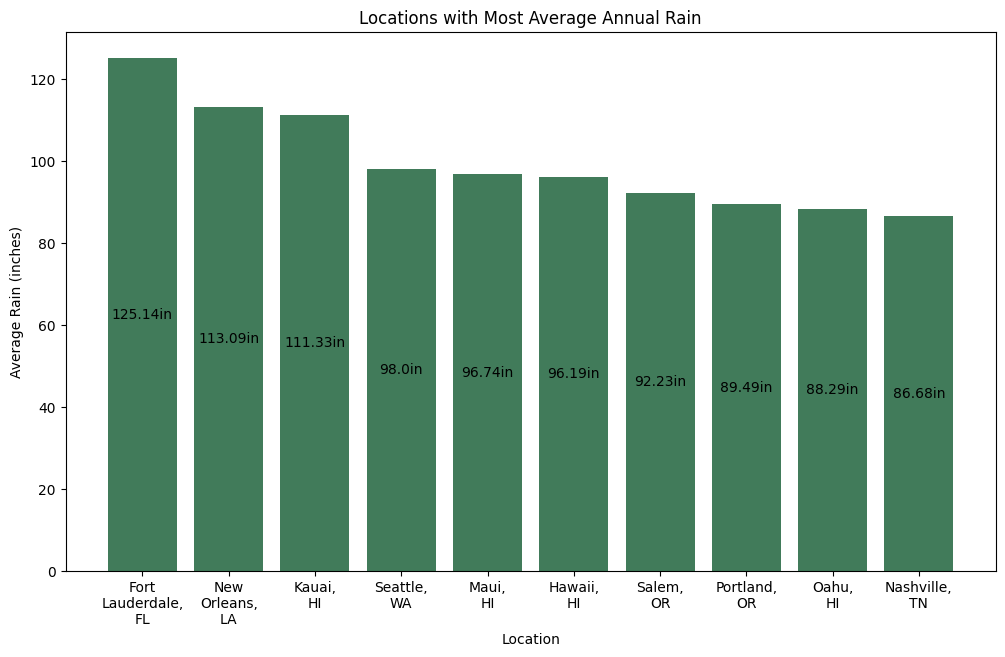

In [28]:
annual_rain_df = pd.DataFrame(columns=('place', 'state', 'tot_rain'))

for i, (tot_rain, place, state) in enumerate(sorted(list(zip(weather.iloc[:, 15:27].sum(axis=1), weather['place'], weather['state'])),reverse=True)):
    avg_rain_temp_list = [place, state, tot_rain]
    annual_rain_df.loc[len(annual_rain_df)] = avg_rain_temp_list
annual_rain_df['place'] = annual_rain_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (12,7))

rain_plot = ax.bar(x=annual_rain_df['place'][:10], height=annual_rain_df['tot_rain'][:10], color= '#417B5A')
ax.bar_label(rain_plot, labels=[(str(round(inches, 2)) + 'in') for inches in annual_rain_df['tot_rain'][:10]], label_type='center')
ax.set(title='Locations with Most Average Annual Rain', xlabel='Location', ylabel='Average Rain (inches)', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in annual_rain_df['place'][:10]])
plt.show();

- To no one's surprise, the Pacific Northwest and Southeastern US regions topped our list of the most rain annually, on average.

##### Which locations see the least rain annually?

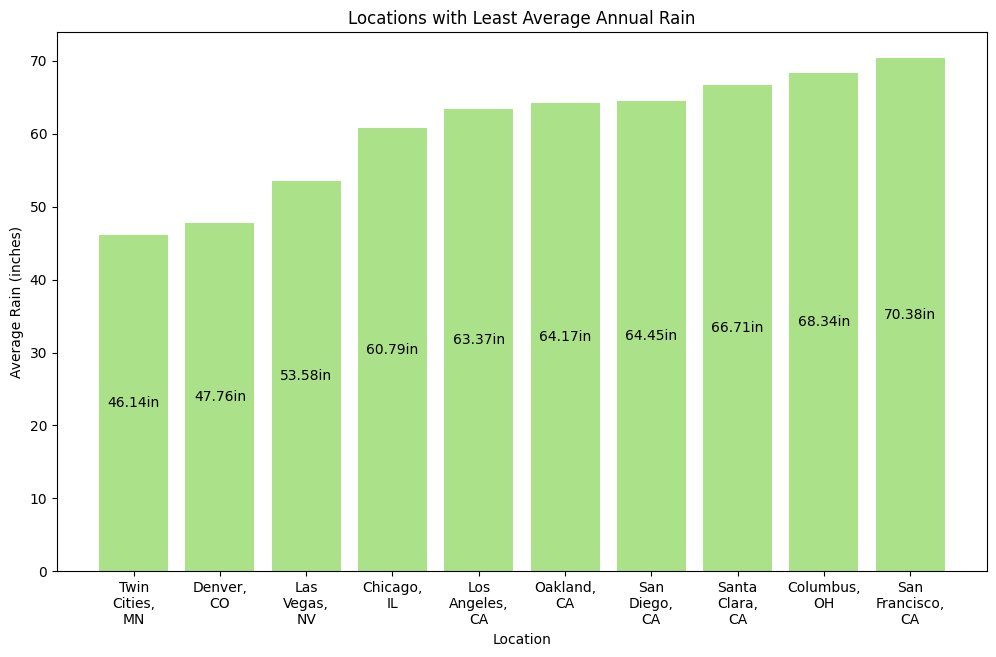

In [29]:
fig, ax = plt.subplots(figsize = (12,7))

less_rain_plot = ax.bar(x=annual_rain_df['place'][-10:][::-1], height=annual_rain_df['tot_rain'][-10:][::-1], color= '#ABE188')
ax.bar_label(less_rain_plot, labels=[(str(round(inches, 2)) + 'in') for inches in annual_rain_df['tot_rain'][-10:][::-1]], label_type='center')
ax.set(title='Locations with Least Average Annual Rain', xlabel='Location', ylabel='Average Rain (inches)', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in annual_rain_df['place'][-10:][::-1]])
plt.show();

- I was expecting to see all of the Hawaiian Islands at the top of the average annual rain rankings, and needed to double-check when three of them showed up on the less-rainy list. According to [this site](https://www.currentresults.com/Weather/Hawaii/yearly-rainfall.php), some areas on each island are very rainy while others receive much less rain, so the overall averages may not be as high other US cities.

##### Can we use the average temperatures and seasonal comfort indices to determine where the best places are to spend summer and winter?

In [30]:
sum_win_idx_temps = pd.concat([
    weather['place'], weather['state'], 
    coli.sort_values('name')['summer_comfort_index'].reset_index(drop=True), 
    weather['summer_avg_temp'], 
    coli.sort_values('name')['winter_comfort_index'].reset_index(drop=True), 
    weather['winter_avg_temp']], 
    axis=1, join='outer')
sum_win_idx_temps['place'] = sum_win_idx_temps[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

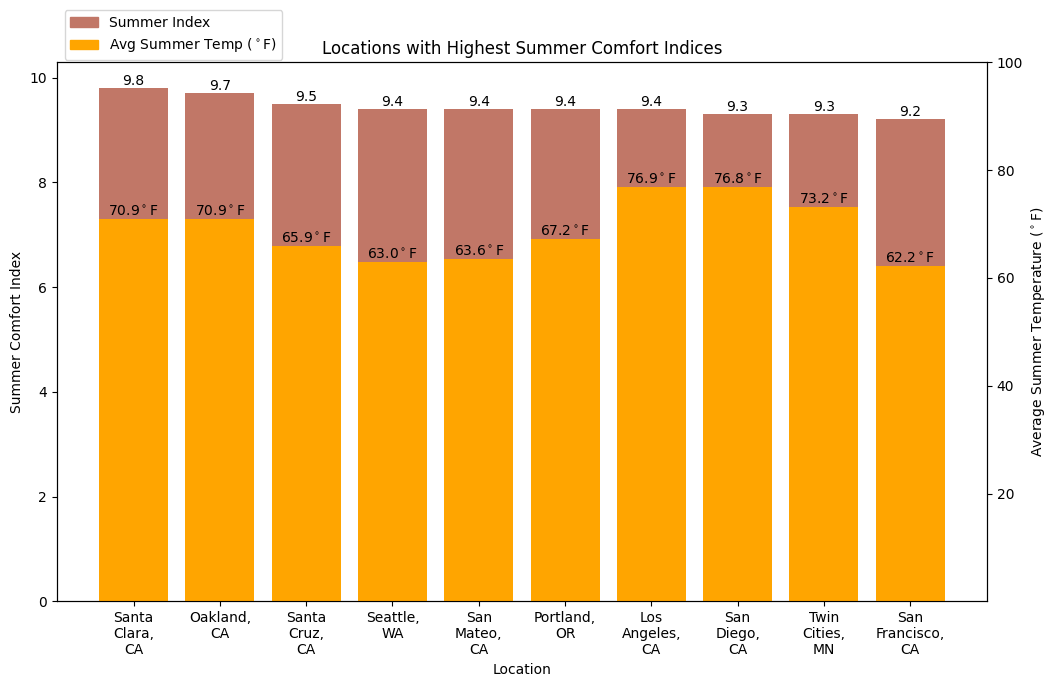

In [31]:
fig, ax = plt.subplots(figsize = (12,7))

summer_idx_plot = ax.bar(x=sum_win_idx_temps.sort_values('summer_comfort_index')['place'][-10:][::-1], height=sum_win_idx_temps.sort_values('summer_comfort_index')['summer_comfort_index'][-10:][::-1], color= '#C17767')
ax.bar_label(summer_idx_plot, labels=[round(score, 2) for score in sum_win_idx_temps.sort_values('summer_comfort_index')['summer_comfort_index'][-10:][::-1]], label_type='edge')
ax.set(title='Locations with Highest Summer Comfort Indices', xlabel='Location', ylabel='Summer Comfort Index', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in sum_win_idx_temps.sort_values('summer_comfort_index')['place'][-10:][::-1]])

ax2 = ax.twinx()
summer_temp_plot = ax2.bar(x=sum_win_idx_temps.sort_values('summer_comfort_index')['place'][-10:][::-1], height=sum_win_idx_temps.sort_values('summer_comfort_index')['summer_avg_temp'][-10:][::-1], color='orange')
ax2.bar_label(summer_temp_plot, labels=[(str(round(degrees, 1)) + '$^\circ$F') for degrees in sum_win_idx_temps.sort_values('summer_comfort_index')['summer_avg_temp'][-10:][::-1]], label_type='edge')
ax2.set(ylabel='Average Summer Temperature ($^\circ$F)', yticks=[20,40,60,80,100])
# ax2.set_ylabel('Average Summer Temperature (F)', rotation=90)

sum_idx = mpatches.Patch(color='#C17767', label='Summer Index')
sum_avg_temp = mpatches.Patch(color='orange', label='Avg Summer Temp ($^\circ$F)')
plt.legend(handles=[sum_idx, sum_avg_temp], bbox_to_anchor=(.25,1.11))

plt.show();

- Despite ranking as two of the coldest, rainiest cities on our list, Portland, OR and Seattle, WA appear to have very pleasant summer temperatures. Looking at the plot above, we're going to want to be on the West Coast or in the Twin Cities during the summer months. 

- All seven California locations ranked in the top ten summer comfort indices. 

- The average summer temperatures in all of the above locations range from 62&deg;F to 77&deg;F.

##### Now looking at winter.

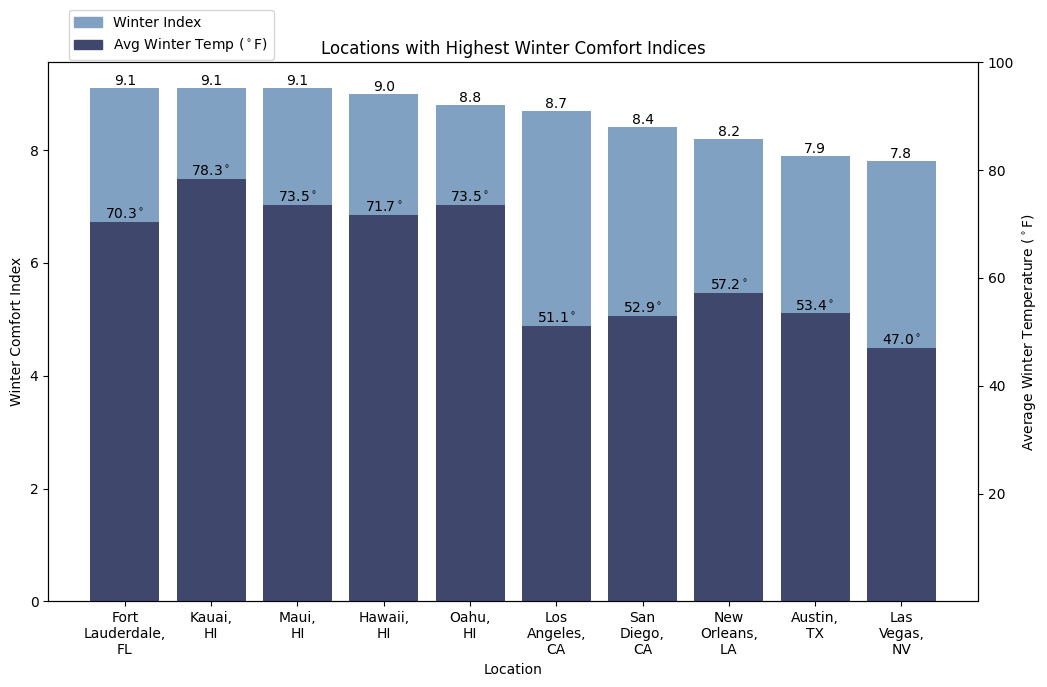

In [32]:
fig, ax = plt.subplots(figsize = (12,7))

winter_idx_plot = ax.bar(x=sum_win_idx_temps.sort_values('winter_comfort_index')['place'][-10:][::-1], height=sum_win_idx_temps.sort_values('winter_comfort_index')['winter_comfort_index'][-10:][::-1], color= '#80A1C1')
ax.bar_label(winter_idx_plot, labels=[round(score, 2) for score in sum_win_idx_temps.sort_values('winter_comfort_index')['winter_comfort_index'][-10:][::-1]], label_type='edge')
ax.set(title='Locations with Highest Winter Comfort Indices', xlabel='Location', ylabel='Winter Comfort Index', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in sum_win_idx_temps.sort_values('winter_comfort_index')['place'][-10:][::-1]])

ax2 = ax.twinx()
summer_temp_plot = ax2.bar(x=sum_win_idx_temps.sort_values('winter_comfort_index')['place'][-10:][::-1], height=sum_win_idx_temps.sort_values('winter_comfort_index')['winter_avg_temp'][-10:][::-1], color='#40476D')
ax2.bar_label(summer_temp_plot, labels=[(str(round(degrees, 1)) + '$^\circ$') for degrees in sum_win_idx_temps.sort_values('winter_comfort_index')['winter_avg_temp'][-10:][::-1]], label_type='edge')
ax2.set(ylabel='Average Winter Temperature ($^\circ$F)', yticks=[20,40,60,80,100])

win_idx = mpatches.Patch(color='#80A1C1', label='Winter Index')
win_avg_temp = mpatches.Patch(color='#40476D', label='Avg Winter Temp ($^\circ$F)')
plt.legend(handles=[win_idx, win_avg_temp], bbox_to_anchor=(.25,1.11))

plt.show();

- There is quite a bit more variation in the average winter temperatures than we saw in the average summer temperatures. With Las Vegas ranking 7.8 on the winter comfort index but having an average temperature of 47&deg;F, we can assume that many other locations on our list have more extreme weather during the winter months.

- Notably, Los Angeles, CA and San Diego, CA both appeared on the 'Best Summer Comfort Indices' and 'Best Winter Comfort Indices' lists.

- All four Hawaiian islands on our list had high winter comfort indices.

---
#### **Walkability**

In [33]:
walk = pd.read_csv('../datasets/cleaned_data/walkability_cleaned.csv') 

walk.head()

,place,state,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx
0,Asheville,NC,0.580614,0.053756,0.946244,0.149850,9.382035
1,Austin,TX,0.718323,0.059187,0.940813,0.286952,11.516379
2,Boston,MA,0.759096,0.301252,0.698748,0.409262,14.936791
3,Cambridge,MA,0.563985,0.102769,0.897231,0.160956,12.458517
4,Chicago,IL,0.636256,0.169022,0.830978,0.310866,13.635529


##### Which locations have the highest walkability indices?

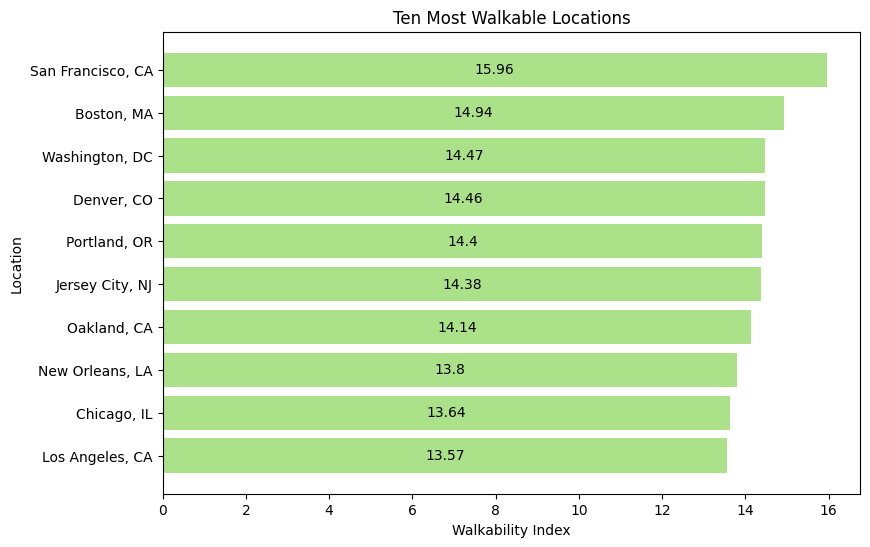

In [34]:
high_walk = walk.sort_values('walkability_idx', ascending=False).head(10)
high_walk['place'] = high_walk[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (9,6))

high_walk_plot = ax.barh(y = high_walk['place'][::-1], width= round(high_walk['walkability_idx'][::-1], 2), color='#ABE188')
ax.bar_label(high_walk_plot, label_type='center')
ax.set(title='Ten Most Walkable Locations', xlabel='Walkability Index', ylabel='Location')
plt.show();

- It looks like a lot of our larger, more populous locations have high walkability. This may have to do with the transit systems, as these are scored and taken into account when calculating the walkability index. 

##### Which locations have the lowest walkability indices?

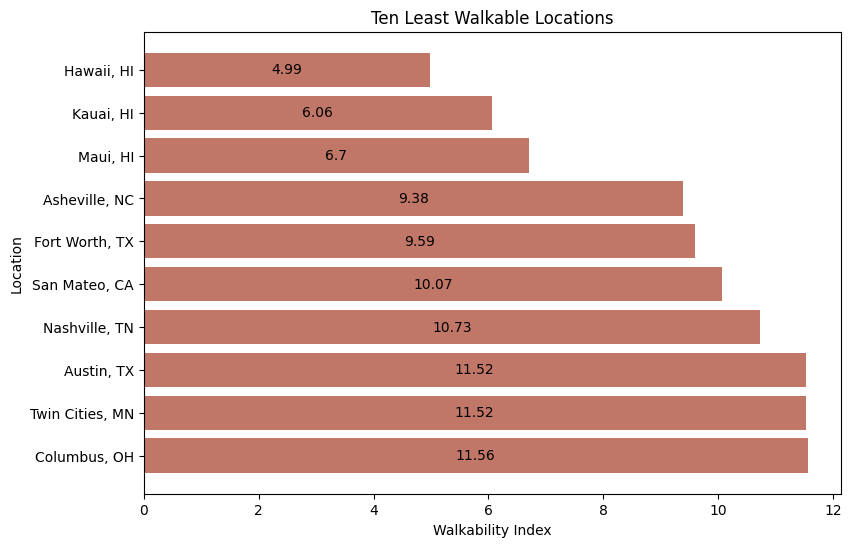

In [35]:
low_walk = walk.sort_values('walkability_idx', ascending=False).tail(10)
low_walk['place'] = low_walk[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (9,6))

low_walk_plot = ax.barh(y = low_walk['place'], width= round(low_walk['walkability_idx'], 2), color='#C17767')
ax.bar_label(low_walk_plot, label_type='center')
ax.set(title='Ten Least Walkable Locations', xlabel='Walkability Index', ylabel='Location')
plt.show();

- Surprisingly, three of the four Hawaiian islands on our list take up the top spots of least walkable locations. 

- Again, we're seeing a regional trend here of the most walkable locations generally being in the coastal states, and the least walkable locations showing somewhat of a lean towards the Midwestern and Southern states.

##### Do we see the same regional split in our zero-car household data?

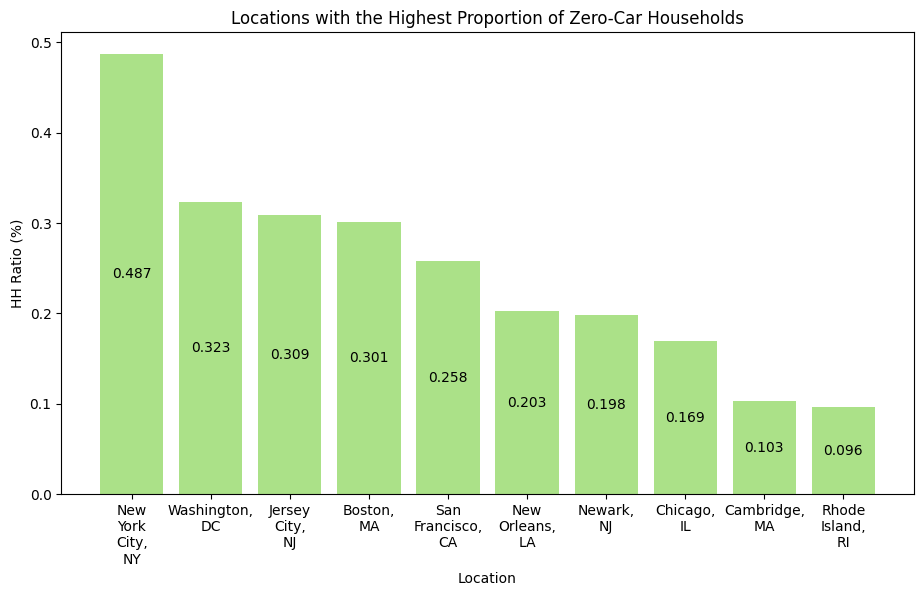

In [36]:
high_0_car_hh = walk.sort_values('pct_no_vehicle', ascending=False).head(10)
high_0_car_hh['place'] = high_0_car_hh[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (11,6))

high_0_car_plot = ax.bar(x = high_0_car_hh['place'], height= round(high_0_car_hh['pct_no_vehicle'], 3), color='#ABE188')
ax.bar_label(high_0_car_plot, label_type='center')
ax.set(title='Locations with the Highest Proportion of Zero-Car Households', xlabel='Location', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in high_0_car_hh['place']], ylabel='HH Ratio (%)')
plt.show();

- Seven out of the ten locations above are located in or around the East Coast (plus or minus Chicago, depending on one's stance).

- We don't have enough information to determine the reasoning behind why these locations have greater proportions of zero-car households. This could be due to better public transit/less need for a vehicle, less wealthy inhabitants who cannot afford a vehicle, or a combination of several factors.

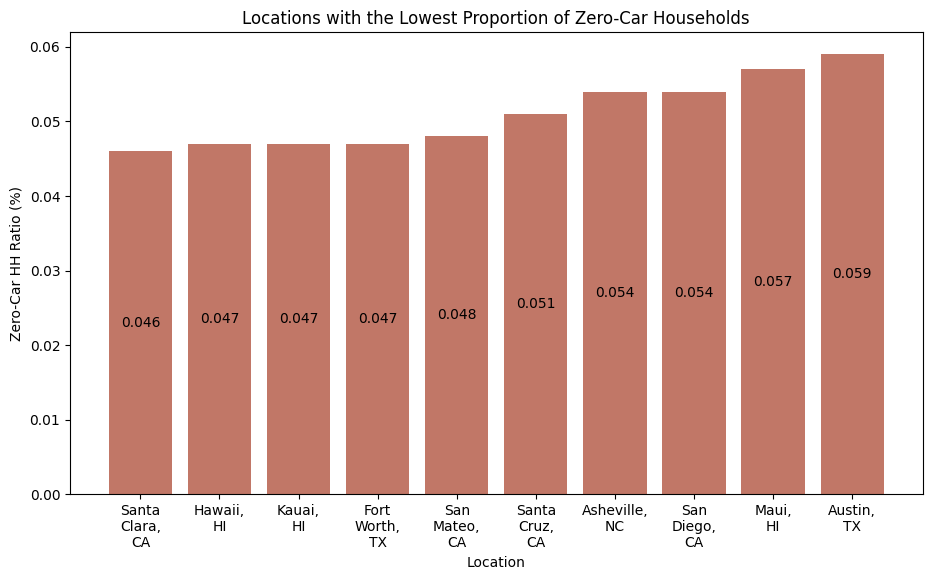

In [37]:
low_0_car_hh = walk.sort_values('pct_no_vehicle', ascending=False).tail(10)
low_0_car_hh['place'] = low_0_car_hh[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (11,6))

low_0_car_plot = ax.bar(x = low_0_car_hh['place'][::-1], height= round(low_0_car_hh['pct_no_vehicle'][::-1], 3), color='#C17767')
ax.bar_label(low_0_car_plot, label_type='center')
ax.set(title='Locations with the Lowest Proportion of Zero-Car Households', xlabel='Location', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in low_0_car_hh['place'][::-1]], ylabel='Zero-Car HH Ratio (%)')
plt.show();

- Out of the locations above, seven also ranked highly on the least walkable places in our list. The three that did not were Santa Clara, CA, Santa Cruz, CA, and San Diego, CA.

- This does not prove any type of causation, but may point us in the direction of less walkability being connected to lower proportions of zero-car households.

---
#### **Experimental EDA - Do we see any notable trends when looking at all of our metrics adjacently?**
In order to plot as efficiently as possible, we'll be combining all of the above dataframes into one large table.

In [58]:
all_feats = pd.concat([pd.DataFrame(airbnb.groupby(['place', 'state'])['price'].mean()).reset_index(), walk.iloc[:, 2:], coli.sort_values('name').reset_index(drop=True).iloc[:, 2:], chain_ratios_df.iloc[:, -1:], weather.iloc[:, 2:]], axis=1)

# Exporting to use in the function-building notebook
all_feats.to_csv('../datasets/cleaned_data/all_features.csv', index=False)
all_feats.head()

,place,state,price,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx,cost_of_living,grocery_cost_idx,...,nov_avg_rain,dec_avg_rain,winter_avg_temp,spring_avg_temp,summer_avg_temp,autumn_avg_temp,winter_avg_rain,spring_avg_rain,summer_avg_rain,autumn_avg_rain
0,Asheville,NC,191.671287,0.580614,0.053756,0.946244,0.149850,9.382035,105.7,103.1,...,3.11,3.69,40.166667,53.333333,70.200000,55.333333,3.710000,4.160000,4.713333,3.423333
1,Austin,TX,280.389031,0.718323,0.059187,0.940813,0.286952,11.516379,129.4,96.7,...,2.52,2.42,53.400000,67.433333,82.333333,70.366667,2.243333,3.256667,2.386667,3.026667
2,Boston,MA,246.906229,0.759096,0.301252,0.698748,0.409262,14.936791,153.4,111.4,...,4.04,4.01,33.100000,49.700000,72.233333,56.000000,3.810000,3.790000,3.463333,3.703333
3,Cambridge,MA,246.035242,0.563985,0.102769,0.897231,0.160956,12.458517,173.7,115.5,...,4.00,3.85,31.100000,49.166667,71.633333,54.533333,3.570000,3.706667,3.523333,3.676667
4,Chicago,IL,235.391606,0.636256,0.169022,0.830978,0.310866,13.635529,107.4,97.2,...,2.44,2.04,28.133333,50.833333,73.933333,55.766667,1.760000,3.223333,3.643333,2.853333


##### Is transit accessibility in a location related to the ratio of households that do not own a vehicle?

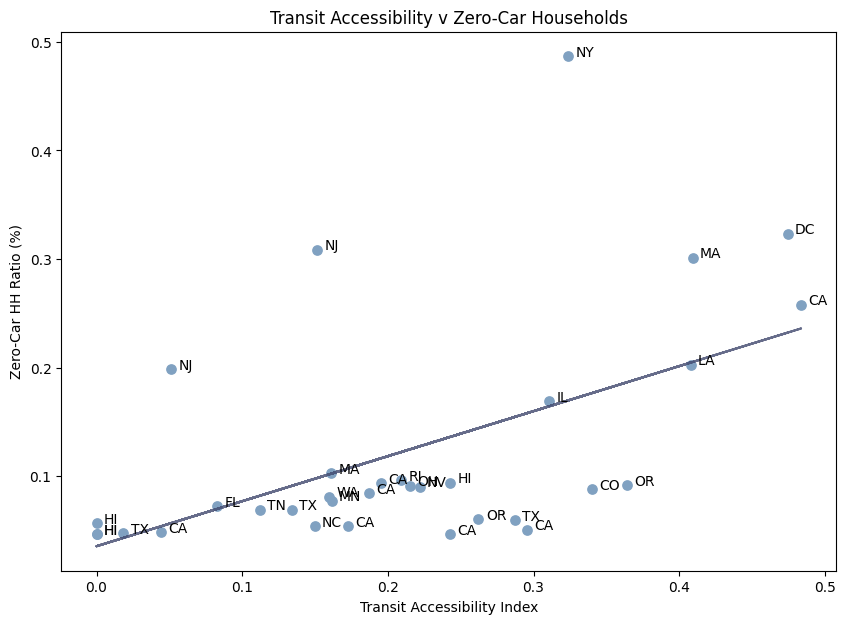

In [39]:
fig, ax = plt.subplots(figsize = (10,7))

# Adding points
ax.scatter(all_feats['transit_accss_idx'], all_feats['pct_no_vehicle'], s=45, c='#80A1C1')

# Adding state abbreviation annotations
for i, (transit_accss, zchh, state) in enumerate(zip(all_feats['transit_accss_idx'], all_feats['pct_no_vehicle'], all_feats['state'])):
    ax.annotate(state, (transit_accss +.005, zchh))

# Plot titles and labeling
ax.set(title='Transit Accessibility v Zero-Car Households', xlabel='Transit Accessibility Index', ylabel='Zero-Car HH Ratio (%)')

# Plotting trendline
z = np.polyfit(all_feats['transit_accss_idx'], all_feats['pct_no_vehicle'], 1)
p = np.poly1d(z)
plt.plot(all_feats['transit_accss_idx'], p(all_feats['transit_accss_idx']), color= '#40476D', alpha=0.8)

plt.show();

- Not necessarily. Though we can see a very slight positive slope in the plot above, most of our locations are clustered in the lower left side of our plot, indicating low zero-car household ratios and low-to-moderate transit accessibility indices.

##### Miscellaneous Cost Index refers to goods and services like clothing, restaurants, and entertainment - all of which would, we believe, lead to increased tourism/Airbnb demand. Is there a relationship between the MCI and average Airbnb prices?

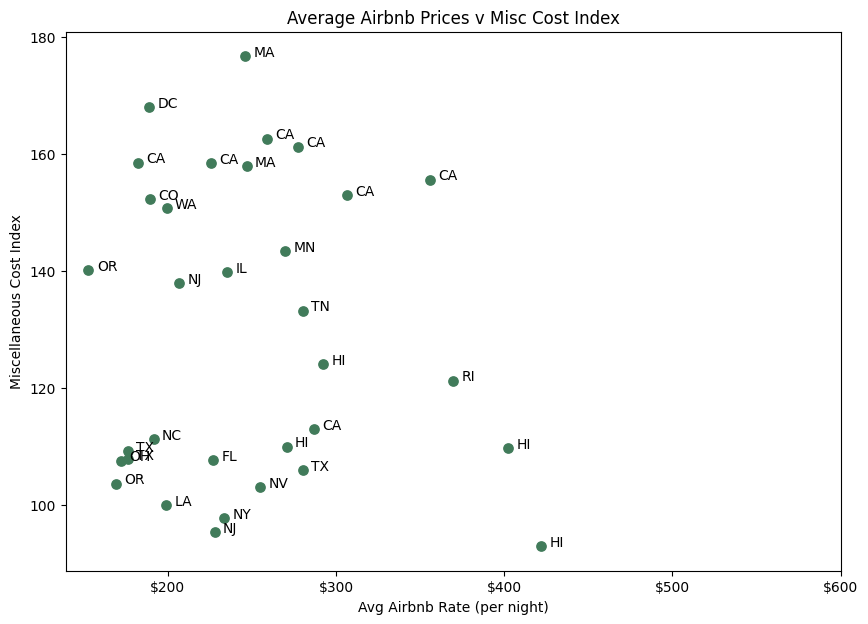

In [40]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(all_feats['price'], all_feats['miscellaneous_cost_idx'], s=45, c='#417B5A')

for i, (price, misc_costs, state) in enumerate(zip(all_feats['price'], all_feats['miscellaneous_cost_idx'], all_feats['state'])):
    ax.annotate(state, (price + 5, misc_costs))

ax.set(title='Average Airbnb Prices v Misc Cost Index', xlabel='Avg Airbnb Rate (per night)', xticks=[200, 300, 400, 500, 600], xticklabels=['$200', '$300', '$400', '$500', '$600'], ylabel='Miscellaneous Cost Index')

plt.show();

- There is no observable linear relationship here, but somewhat of a divide seen along the y-axis, meaning that there could be some factor that is causing a regional split along the miscellaneous cost index values.

- Based on the definition of the miscellaneous cost index (mentioned above), it would track that the locations with the higher indices are generally located in the more populous, urban states.

##### Similar to our prior cost of living v political skew plot, is there a relationship between a location's chain ratio and political preferences?

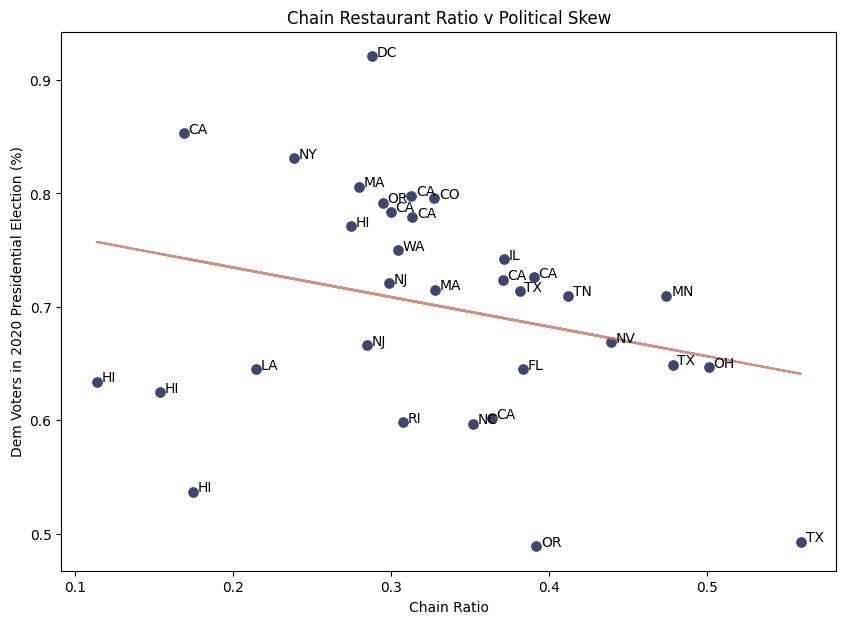

In [41]:
fig, ax = plt.subplots(figsize = (10,7))

# Adding points
ax.scatter(all_feats['chain_ratio'], all_feats['political_left_lean'], s=45, c='#40476D')

# Adding state abbreviation annotations
for i, (col, pol, state) in enumerate(zip(all_feats['chain_ratio'], all_feats['political_left_lean'], all_feats['state'])):
    ax.annotate(state, (col +.003, pol))

# Plot titles and labeling
ax.set(title='Chain Restaurant Ratio v Political Skew', xlabel='Chain Ratio', ylabel='Dem Voters in 2020 Presidential Election (%)')

# Plotting trendline
z = np.polyfit(all_feats['chain_ratio'], all_feats['political_left_lean'], 1)
p = np.poly1d(z)
plt.plot(all_feats['chain_ratio'], p(all_feats['chain_ratio']), color= '#C17767', alpha=0.8)

plt.show();

- There is a slight downward trend here, indicating that as the chain ratio in a location increases, we can expect the political opinions of this location's population to skew slightly more Republican.

- However, the relationship between the two features is not strong enough to make any definitive statements.

#### Are there more chain restaurants in locations where the grocery cost index is higher?

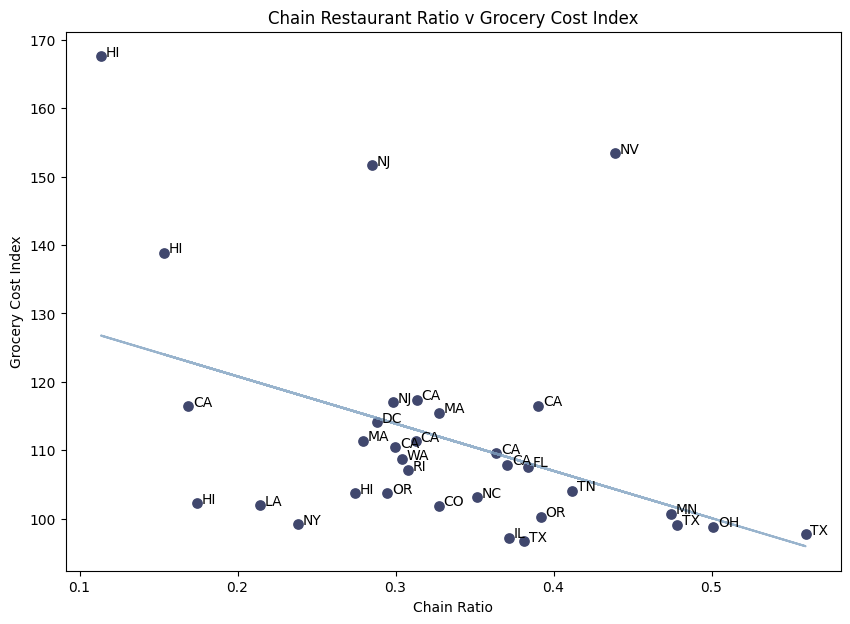

In [42]:
fig, ax = plt.subplots(figsize = (10,7))

# Adding points
ax.scatter(all_feats['chain_ratio'], all_feats['grocery_cost_idx'], s=45, c='#40476D')

# Adding state abbreviation annotations
for i, (col, pol, state) in enumerate(zip(all_feats['chain_ratio'], all_feats['grocery_cost_idx'], all_feats['state'])):
    ax.annotate(state, (col +.003, pol))

# Plot titles and labeling
ax.set(title='Chain Restaurant Ratio v Grocery Cost Index', xlabel='Chain Ratio', ylabel='Grocery Cost Index')

# Plotting trendline
z = np.polyfit(all_feats['chain_ratio'], all_feats['grocery_cost_idx'], 1)
p = np.poly1d(z)
plt.plot(all_feats['chain_ratio'], p(all_feats['chain_ratio']), color= '#80A1C1', alpha=0.8)

plt.show();

- Quite the opposite. We find above that the locations where groceries are cheaper tend to have greater ratios of chain restaurants.

- This brings up an important point about the connections between seemingly unrelated variables. Noted by the creators of the chain data, a greater number of independent restaurants is associated with more dense but pedestrian-friendly environments, highly-educated populations, wealthier populations, more racially diverse areas, and more tourist-heavy locations.

---
#### **Final Notes**
- The only export from this notebook is the conglomerated [dataframe](../datasets/cleaned_data/all_features.csv) that includes all features.
- All charts above can be found in the visualizations directory.
- The next notebook in this series is [Building Recommender Functions](03_building_rec_function.ipynb).